# Análise Exploratória de Dados

É o processo crítico de realizar investigalções iniciais nos dados para descobrir padrões, detectar anomalias testar hipóteses e verificar suposições com a ajuda de estatísticas e representações gráficas.
EDA - *Exploatory Data Analysis* Analisar e investigar conjuntos de dados e resumir suas principais características, geralmente empregando métodos de visualizaçõa de dados.

#### Data Wrangling
É o processo de limeza e unificação de conjuntos de dadso, brutos e complexos, para facilitar a análise.

### Definição do Problema
Uma empresa internacional de comércio eletrônico (E-commerce) que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.
Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa em qualquer parte do mundo. Os produtos são enviados de Naviom, Avião ou Caminhão, dependendo da região de entrega. 
Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra. O único dados pessoal sobre o cliente que está disponível é o gênero. 
Nosso trabalho neste Estudo de Caso é explorar os dados, compreender como estão organizados, detectar eventuais problemas e analisar os dados por diferentes perpectivas. 

#### Dicionário de Dados


|Nome da Coluna| Tipo de Dado | Descrição|
|-|-|-|
|**ID**|Int|ID exclusivo de cada transação|
|**corredor_armazem**|Character(1)|Letra do corredor do armazém onde o produto está armazenado|
|**numero_chmadas_cliente**|String|Modo de envio do produto|
|**numero_chamdas_cliente**|Int| Número de vezes que o cliente acionou o suporte da empresa|
|**avaliacao_cliente**|Int|Avaliação do clente sobre a experiência de compra|
|**custo_produto**|Int| Custo do produto|
|**compras_anteirores**|Int|Número de vezes que o cliente fez uma compra na empresa|
|**prioridade_produto**|String| Prioridade de entrega do produto|
|**genero**|Character(1)|Gênero do cliente(F ou M)|
|**desconto**|Int|Desconto concedido na compra do produto|
|**peso_gramas**|Int|Peso do produto|
|**entregue_no_prazo**|Character(1)|Se o produto foi entregue no prazo, sendo 0(não foi entregue no prazo) ou 1 (foi entregue no prazo)|

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [25]:
df = pd.read_csv('arquivos/dataset.csv')
print('Shape: ', df.shape)
df.info()

Shape:  (11000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [26]:
# Mostra as cinco primeiras linhas
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [27]:
# Mostra cinco registros aleatórios
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
6335,6336,F,Navio,3,1,264,3,baixa,F,5,5043,0
4605,4606,B,Navio,5,2,178,5,baixa,F,5,5167,0
9860,9861,A,Aviao,3,2,247,3,baixa,M,3,4338,0
8047,8048,F,Navio,6,5,301,5,baixa,M,8,1443,0
7136,7137,A,Aviao,5,4,238,3,alta,F,5,5907,1


In [28]:
# Mostra as cinco últimas linhas
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


In [29]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [30]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [31]:
dados_categoricos = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [32]:
dados_numericos = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 'desconto', 'peso_gramas']

In [33]:
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [34]:
df[dados_numericos].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**Observações**
1. As colunas **numero_chamadas_cliente**, **avaliacao_cliente** e **custo_produto** parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).
1. As colunas **compras_anteriores** e **desconto** parecem estar inclinadas para a direita (Média maior do que a Mediana). 
1. A coluna **peso_gramas** parece estar mais inclinada para a esquerda (Média menor do que a Meidana)

## Histograma 
Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre. Ao mesmo tempo, ele pode ser utilizado como um indicador de dispersão de processos.
Quando você precisa apresentar ou tirar conclusões de um grande conjunto de dados e está trabalhando com conceitos envolvendo frequências, sejam absolutas ou relativas, o histograma é o melhor caminho a se tomar. Ele nos auxilia com a representação gráfica dos conjuntos de dados de forma mais amigável, tornando mais fácil a visualização de onde a maioria dos valores se concentram.

![Histograma](arquivos/imagens/histograma.png)
![Histograma](arquivos/imagens/histograma_tabela.png)

### Média 
(Mean ou Average em inglês) é uma medida de tendência central dos dados, ou seja, um número em torno do qual um dataset inteiro está distribuído. É um número único que pode estimar o valor do conjunto de dados completo.

### Mediana
É o valor que divide os dados em 2 partes iguais, ou seja, o número de termos no lado direito é igual ao  número de termos no lado esquerdo quando os dados são organizados em ordem crescente ou decrescente.
A Mediana será um elemento do meio da distribuição, se o número de termos for ímpar.
A Mediana será a média de 2 elementos do meio da distribuição, se o número de termos for par.

### Moda
É o termo que aparece mais vezes no conjunto de dados, ou seja, o termo que tem a frequência mais alta.
Mas pode haver um conjunto de dados em que não há nenhuma Moda, pois todos os valores aparecem o mesmo número de vezes.
Se dois valores aparecerem ao mesmo tempo e mais do que o resto dos valores, o conjunto de dados será bimodal. Se três valores aparecerem no mesmo tempo e mais do que o resto dos valores, o conjunto de dados é
trimodal e, para n modas, esse conjunto de dados é multimodal.

![Definição](arquivos/imagens/histograma_definicao.png)

<AxesSubplot:>

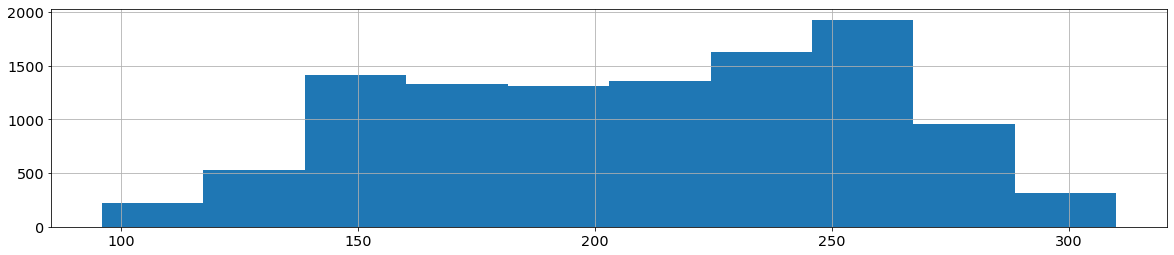

In [35]:
df['custo_produto'].hist()

<AxesSubplot:>

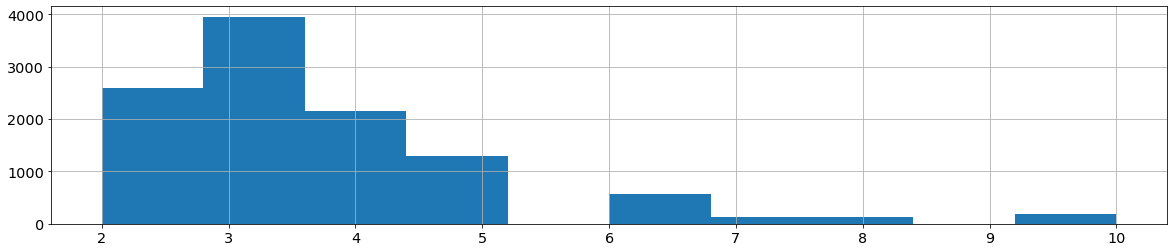

In [36]:
df['compras_anteriores'].hist()

### Explorando as Variáveis Categóricas

In [37]:
df[dados_categoricos].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:
- Para a variável carrdor_armazem **F** é a classe dominante.
- Para a variável de modo de envio **Navio** é a classe dominante.
- Para a variável de prioridade do produto **baixa** é a classe dominante.
- Para a variável de gênero, **F(Feminino)** é a classe dominante. 
- Todos os valores únicos para cada categoria estão em torno de **2-5 vallores únicos**.

In [38]:
for coluna in dados_categoricos:
    print(f'Total de Registro por Categoraia da Variável {coluna}: ')
    print(df[coluna].value_counts())
    print()

Total de Registro por Categoraia da Variável corredor_armazem: 
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registro por Categoraia da Variável modo_envio: 
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registro por Categoraia da Variável prioridade_produto: 
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registro por Categoraia da Variável genero: 
F    5546
M    5454
Name: genero, dtype: int64



### Anpalise Univariada - Box Plots

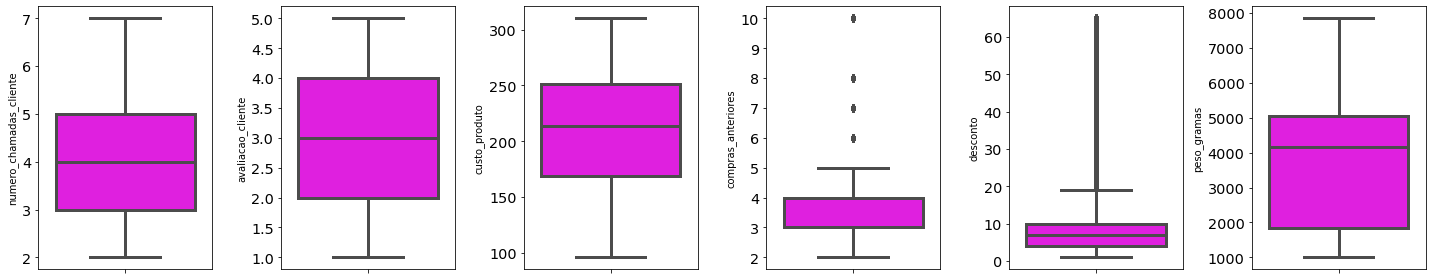

In [39]:
features = dados_numericos
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color='magenta', orient='v')
    plt.tight_layout()

### Análise Univariada - Dist Plots

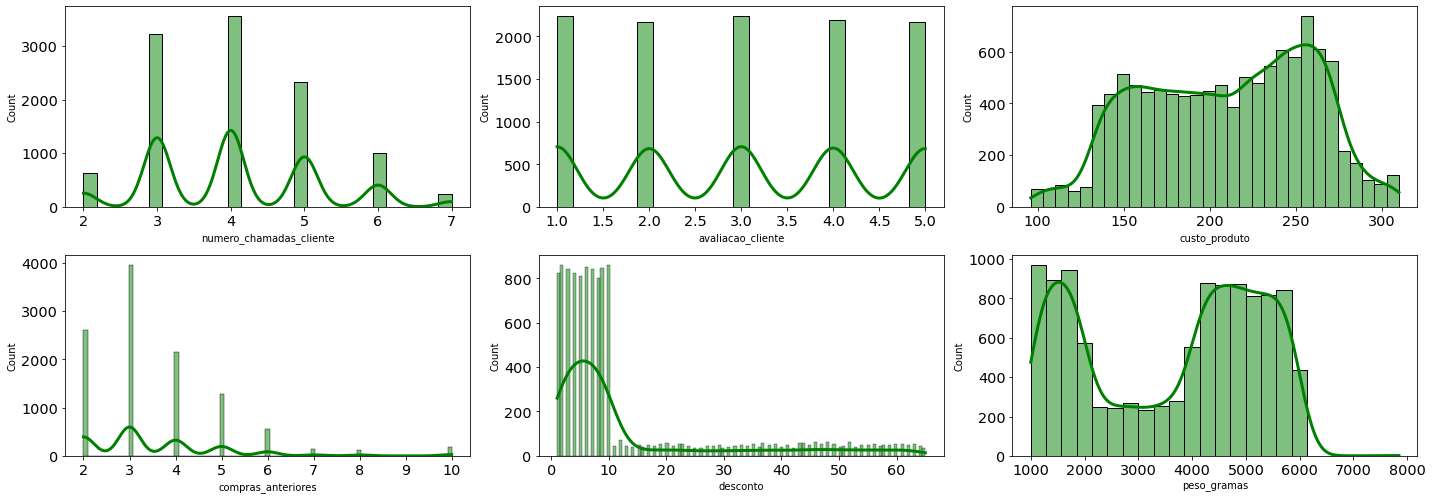

In [40]:
features = dados_numericos
plt.figure(figsize = (20, 10))
for i in range(0, len(dados_numericos)):
    plt.subplot(3, int(len(dados_numericos)/2), i+1)
    sns.histplot(x = df[features[i]], kde = True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observações**
- Gráficos **numero_chamadas_cliente** e **avaliacao_cliente** parecem seguir uma distribuiçõa uniforme. 
- Gráfico **custo_produto** quase tem uma distribuição uniforme. 
- Gráficos **compras_anteriores** e **desconto** tem distribuição assimétrica. 
- Gráfico **peso_gramas** formato em formato de **U** não é possível indentificar a distribuição da variável. 

### Análise Univariada - Violin Plots

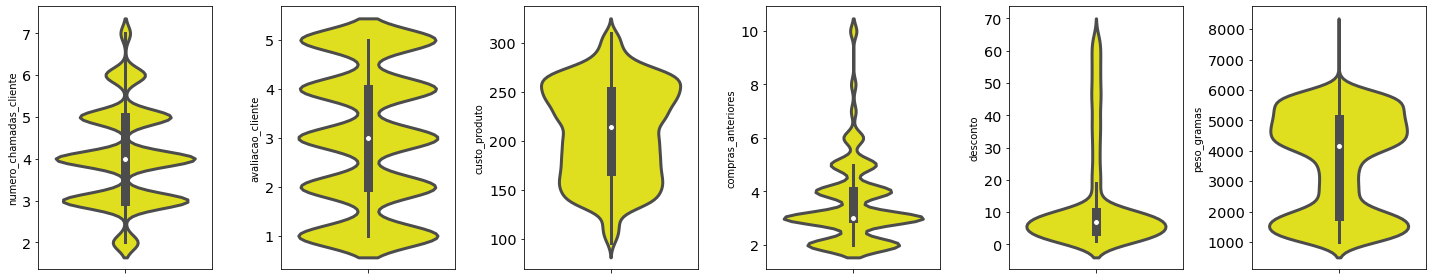

In [41]:
for i in range(0, len(dados_numericos)):
    plt.subplot(1, len(dados_numericos), i+1)
    sns.violinplot(y = df[dados_numericos[i]], color='yellow', orient='v')
    plt.tight_layout()

### Análise Univariada - Count Plot(Categorical)

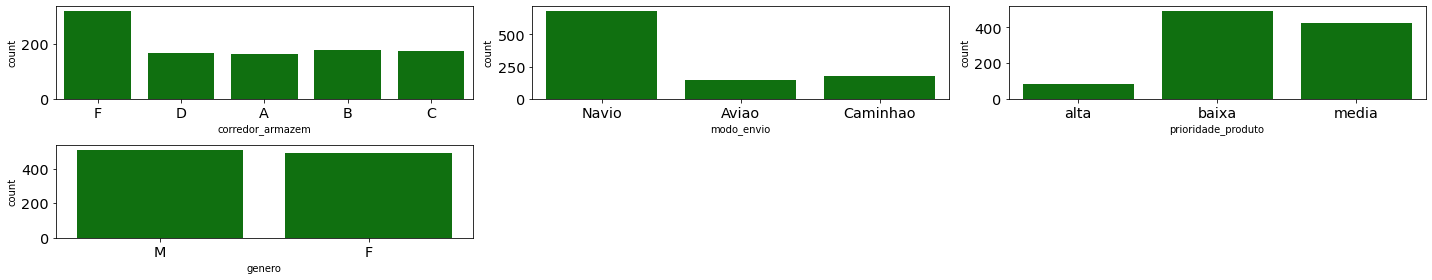

In [44]:
df_sample = df.sample(1000, random_state=42)

for i in range(0, len(dados_categoricos)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[dados_categoricos[i]], color='green', orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

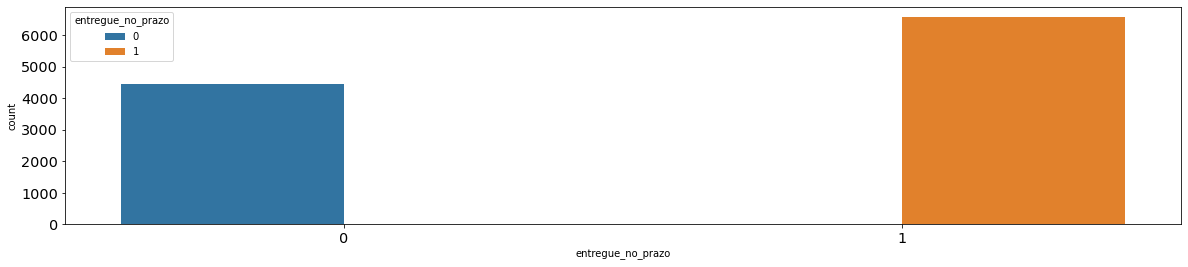

In [47]:
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

**Observações**
- A maioria dos produtos vieram do corredor F. 
- Modo de envio através do navio é o mais comum. 
- Há poucos produtos com prioridade alta de entrega.
- A proporção de clientes Masculino e Feminina é praticamente a mesma. 